In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Pré-processamento e modelagem
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Tratamento de desequilíbrio de classes
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv('df_interrupcoes.csv')
df=df.drop('Unnamed: 0',axis=1)

(195408, 20)

In [ ]:
df_clima = pd.read_csv('/content/Clima_Santana.csv')
del df_clima['Unnamed: 0']

In [ ]:
# Combinar as colunas 'Dia' e 'Hora' em 'Data_Hora'
df_clima['Data_Hora'] = pd.to_datetime(df_clima['Dia'] + ' ' + df_clima['Hora'])


<ipython-input-72-7211bd0d778a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clima['Data_Hora'] = pd.to_datetime(df_clima['Dia'] + ' ' + df_clima['Hora'])


In [ ]:
# Criar um dicionário de mapeamento de códigos para descrições
mapa_simbolos = {
    0: 'Não determinado',
    1: 'Céu limpo',
    101: 'Céu limpo',
    2: 'Poucas nuvens',
    102: 'Poucas nuvens',
    3: 'Parcialmente nublado',
    103: 'Parcialmente nublado',
    4: 'Nublado',
    104: 'Nublado',
    5: 'Chuva',
    105: 'Chuva',
    6: 'Chuva e neve / granizo',
    106: 'Chuva e neve / granizo',
    7: 'Neve',
    107: 'Neve',
    8: 'Pancada de chuva',
    108: 'Pancada de chuva',
    9: 'Pancada de neve',
    109: 'Pancada de neve',
    10: 'Pancada de granizo',
    110: 'Pancada de granizo',
    11: 'Névoa leve',
    111: 'Névoa leve',
    12: 'Névoa densa',
    112: 'Névoa densa',
    13: 'Chuva congelante',
    113: 'Chuva congelante',
    14: 'Tempestades',
    114: 'Tempestades',
    15: 'Chuvisco',
    115: 'Chuvisco',
    16: 'Tempestade de areia',
    116: 'Tempestade de areia'
}
df_clima['Descricao_Tempo'] = df_clima['Simbolo_Tempo_1h'].map(mapa_simbolos)


In [ ]:
# Selecionar as colunas relevantes
colunas_relevantes = [
    'Data_Hora',
    'Velocidade_Vento_ms',
    'Rajadas_Vento_ms',
    'Temperatura_C',
    'Precipitacao_1h_mm',
    'Distrito',
    'Descricao_Tempo'
]
df_clima = df_clima[colunas_relevantes]


In [ ]:
# Converter
colunas_numericas = ['Velocidade_Vento_ms', 'Rajadas_Vento_ms', 'Temperatura_C', 'Precipitacao_1h_mm']
df_clima[colunas_numericas] = df_clima[colunas_numericas].apply(pd.to_numeric, errors='coerce')


<ipython-input-82-8b8f1ac3bd93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clima[colunas_numericas] = df_clima[colunas_numericas].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Reorganizar as colunas
df_clima = df_clima[['Data_Hora', 'Distrito','Descricao_Tempo', 'Velocidade_Vento_ms', 'Rajadas_Vento_ms', 'Temperatura_C', 'Precipitacao_1h_mm']]


In [ ]:
df_previsao = df[df['DscTipoInterrupcao']== 'Não Programada']

In [ ]:
df_santana = df_previsao.copy()
df_santana = df_santana[df_santana['Distrito'] == 'SANTANA']

In [26]:
import pandas as pd
df_tempo_medio = pd.read_csv('df_interrupcoes.csv')
df_tempo_medio = df_tempo_medio.drop('Unnamed: 0',axis=1)
df_tempo_medio

,DatGeracaoConjuntoDados,IdeConjuntoUnidadeConsumidora,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ,Distrito,Duracao_Ocorrencia
0,2024-03-14,12877.0,CARRÃO,CRA 0113,CRA,9798075-1,Não Programada,0.0,2022-01-25 07:21:33,2022-01-25 10:23:42,Interna - Nao Programada - Proprias do sistema...,240.0,1.0,85424.0,2022.0,ELETROPAULO METROPOLITANA ELETRICIDADE DE SAO ...,ELETROPAULO,61695227000193,CARRÃO,0 days 03:02:09
1,2024-03-14,12853.0,BELA ALIANÇA,BAL 0105,BAL,9858282-1,Não Programada,0.0,2022-02-06 09:36:00,2022-02-06 11:43:55,Interna - Nao Programada - Falha operacional -...,240.0,2.0,66101.0,2022.0,ELETROPAULO METROPOLITANA ELETRICIDADE DE SAO ...,ELETROPAULO,61695227000193,LAPA,0 days 02:07:55
2,2024-03-14,12922.0,ITAQUERA,ITR 0104,ITR,9961888-1,Não Programada,3.0,2022-03-05 15:20:21,2022-03-05 20:33:32,Interna - Nao Programada - Meio ambiente - Vento,13800.0,528.0,95653.0,2022.0,ELETROPAULO METROPOLITANA ELETRICIDADE DE SAO ...,ELETROPAULO,61695227000193,ITAQUERA,0 days 05:13:11
3,2024-03-14,12922.0,ITAQUERA,ITR 0114,ITR,10020049-1,Não Programada,0.0,2022-03-16 07:14:38,2022-03-16 11:34:45,Interna - Nao Programada - Terceiros - Interfe...,240.0,4.0,95653.0,2022.0,ELETROPAULO METROPOLITANA ELETRICIDADE DE SAO ...,ELETROPAULO,61695227000193,ITAQUERA,0 days 04:20:07
4,2024-03-14,15832.0,LIMÃO,TED 0105,TED,10070692-1,Não Programada,0.0,2022-03-29 06:03:05,2022-03-29 15:49:01,Interna - Nao Programada - Terceiros - Interfe...,240.0,1.0,55295.0,2022.0,ELETROPAULO METROPOLITANA ELETRICIDADE DE SAO ...,ELETROPAULO,61695227000193,LIMÃO,0 days 09:45:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507506,2024-09-10,17203.0,PARQUE INDUSTRIAL,RPIL 1308,PARQUE INDUSTRIAL,6854208.0,Não Programada,0.0,2024-06-30 18:23:00,2024-06-30 22:36:00,Interna;Não programada;Próprias do sistema;Fal...,220.0,5.0,75966.0,2024.0,EDP SÃO PAULO DISTRIBUIÇÃO DE ENERGIA S.A.,EDP SP,2302100000106,ITAIM PAULISTA,0 days 04:13:00
507507,2024-09-10,16655.0,VILA GALVAO,RVGA 0111,VILA GALVAO,6854277.0,Não Programada,0.0,2024-06-30 20:23:00,2024-06-30 22:51:00,Interna;Não programada;Próprias do sistema;Fal...,240.0,1.0,52902.0,2024.0,EDP SÃO PAULO DISTRIBUIÇÃO DE ENERGIA S.A.,EDP SP,2302100000106,JAÇANÃ,0 days 02:28:00
507508,2024-09-10,16636.0,DUTRA,RDUT 0108,DUTRA,6854191.0,Não Programada,0.0,2024-06-30 17:49:00,2024-06-30 19:20:00,Interna;Não programada;Terceiros;Objeto na rede,13800.0,314.0,67713.0,2024.0,EDP SÃO PAULO DISTRIBUIÇÃO DE ENERGIA S.A.,EDP SP,2302100000106,CIDADE DUTRA,0 days 01:31:00
507509,2024-09-10,16636.0,DUTRA,RPME 0103,PIMENTAS,6854140.0,Não Programada,0.0,2024-06-30 16:19:00,2024-06-30 16:19:00,Interna;Não programada;Não classificada;,13800.0,2.0,67713.0,2024.0,EDP SÃO PAULO DISTRIBUIÇÃO DE ENERGIA S.A.,EDP SP,2302100000106,CIDADE DUTRA,0 days 00:00:00


In [27]:
df_tempo_medio['Duracao_Ocorrencia'] = pd.to_timedelta(df_tempo_medio['Duracao_Ocorrencia'])

from unidecode import unidecode

def remover_acentos(texto):
    # Remover acentos usando unidecode
    texto_sem_acentos = unidecode(texto)
    # Substituir 'Ç' por 'C'
    return texto_sem_acentos.replace('Ç', 'C')
df_tempo_medio['Distrito'] = df_tempo_medio['Distrito'].apply(remover_acentos)
# Calcular a média de duração por distrito
media_duracao_por_distrito = df_tempo_medio.groupby('Distrito')['Duracao_Ocorrencia'].mean()



# Função para formatar timedelta em horas e minutos (HH:MM)
def formatar_timedelta(td):
    total_seconds = td.total_seconds()
    hours, remainder = divmod(total_seconds, 3600)
    minutes, _ = divmod(remainder, 60)
    return f"{int(hours):02}:{int(minutes):02}"

# Aplicar a função de formatação a cada valor da série
df_media_formatada = media_duracao_por_distrito.apply(formatar_timedelta)

# Exibir o resultado formatado
print(df_media_formatada)

# Função para remover acentos e trocar 'Ç' por 'C'


# Aplicar a função na coluna 'Distrito'
#df_media_formatada.to_csv('Duracao_Ocorrencia.csv', index=True)


Distrito
BARRA FUNDA           09:35
BELA VISTA            12:43
BRASILANDIA           10:15
BUTANTA               10:00
CACHOEIRINHA          10:02
CAMBUCI               09:40
CAMPO BELO            09:43
CAMPO GRANDE          09:24
CAMPO LIMPO           12:15
CARRAO                09:23
CASA VERDE            09:09
CIDADE DUTRA          09:05
CONSOLACAO            14:15
ERMELINO MATARAZZO    08:43
GRAJAU                09:50
GUAIANASES            08:49
IPIRANGA              10:01
ITAIM BIBI            09:22
ITAIM PAULISTA        06:43
ITAQUERA              07:45
JABAQUARA             13:54
JACANA                11:19
JAGUARE               10:43
JARAGUA               09:16
LAPA                  10:14
LIBERDADE             15:45
LIMAO                 08:38
MANDAQUI              09:05
MOOCA                 10:50
MORUMBI               11:15
PARELHEIROS           11:15
PARI                  10:02
PARQUE DO CARMO       09:14
PEDREIRA              10:18
PERDIZES              08:34
PINHEIROS  

In [29]:
df_media_formatada.to_csv('Duracao_Ocorrencia.csv', index=True)


In [ ]:
df_previsao['DatInicioInterrupcao'] = pd.to_datetime(df_previsao['DatInicioInterrupcao'])
df_previsao['DatFimInterrupcao'] = pd.to_datetime(df_previsao['DatFimInterrupcao'])
df_previsao['Data'] = df_previsao['DatInicioInterrupcao'].dt.floor('D')

<ipython-input-32-79892f9fdd60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsao['DatInicioInterrupcao'] = pd.to_datetime(df_previsao['DatInicioInterrupcao'])
<ipython-input-32-79892f9fdd60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_previsao['DatFimInterrupcao'] = pd.to_datetime(df_previsao['DatFimInterrupcao'])
<ipython-input-32-79892f9fdd60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
import pandas as pd

# Definir a função para converter 'Duracao_Ocorrencia' em horas
def parse_duracao_ocorrencia(s):
    try:
        # Dividir em dias e tempo
        parts = s.split(' days ')
        if len(parts) != 2:
            return None
        days = int(parts[0])
        time_part = parts[1]
        # Dividir o tempo em horas, minutos e segundos
        time_parts = time_part.split(':')
        if len(time_parts) != 3:
            return None
        hours = int(time_parts[0])
        minutes = int(time_parts[1])
        seconds = float(time_parts[2])  # Usar float para capturar frações de segundo
        # Calcular o total de segundos
        total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
        # Converter para horas
        total_hours = total_seconds / 3600
        return total_hours
    except Exception as e:
        print(f"Erro ao processar '{s}': {e}")
        return None

# Aplicar a função para criar a nova coluna 'Duracao_Horas'
df_santana['Duracao_Horas'] = df_santana['Duracao_Ocorrencia'].apply(parse_duracao_ocorrencia)

# Verificar se há valores nulos
num_nulos = df_santana['Duracao_Horas'].isnull().sum()
print(f"Número de valores nulos em 'Duracao_Horas': {num_nulos}")


Número de valores nulos em 'Duracao_Horas': 0


In [ ]:
interrupcoes_por_dia = df_santana[df_santana['DatInicioInterrupcao']>='2024-04-30']
interrupcoes_por_dia = interrupcoes_por_dia[interrupcoes_por_dia['DatInicioInterrupcao'] < '2024-06-01']
interrupcoes_por_dia = interrupcoes_por_dia[interrupcoes_por_dia['IdeMotivoInterrupcao'].isin([3,6])]
interrupcoes_por_dia = interrupcoes_por_dia.groupby('DatInicioInterrupcao').agg({
    'Duracao_Horas': ['count', 'sum', 'mean']
}).reset_index()
interrupcoes_por_dia.columns = ['Data', 'Numero_Interrupcoes', 'Duracao_Total_Horas', 'Duracao_Media_Horas']
interrupcoes_por_dia['Data'] = pd.to_datetime(interrupcoes_por_dia['Data'])


In [ ]:
interrupcoes_por_dia['Data_Hora'] = pd.to_datetime(interrupcoes_por_dia['Data'])

# Arredondar para a hora cheia anterior
interrupcoes_por_dia['Data_Hora'] = interrupcoes_por_dia['Data_Hora'].dt.floor('H')

In [ ]:
interrupcoes_por_dia['Data'] = interrupcoes_por_dia['Data'].dt.floor('D')
interrupcoes_por_dia



,Data,Numero_Interrupcoes,Duracao_Total_Horas,Duracao_Media_Horas
0,2023-02-17,1,7.758611,7.758611
1,2023-02-18,1,13.733056,13.733056
2,2023-02-19,1,35.079722,35.079722
3,2023-03-09,1,27.978889,27.978889
4,2023-03-09,1,37.530278,37.530278
5,2023-04-17,1,19.941389,19.941389
6,2023-08-09,1,5.749167,5.749167
7,2023-08-09,1,1.258889,1.258889
8,2023-08-09,1,2.081944,2.081944
9,2023-08-09,1,3.347500,3.347500


In [ ]:

df_merged = pd.merge(df_clima, interrupcoes_por_dia, on=['Data_Hora'], how='left')


In [ ]:
df_merged = df_merged.sort_values('Data_Hora').reset_index(drop=True)

df_merged['Alvo'] = df_merged['Numero_Interrupcoes'].apply(lambda x: 1 if x >= 1 else 0)


In [ ]:
# Criar uma coluna com o número de interrupções da próxima hora
df_merged['Numero_Interrupcoes_ProxHora'] = df_merged['Numero_Interrupcoes'].shift(-1)

df_merged['Numero_Interrupcoes_ProxHora'] = df_merged['Numero_Interrupcoes_ProxHora'].fillna(0)

# Criar a classe 2 para as horas que antecedem uma interrupção
df_merged.loc[
    (df_merged['Alvo'] == 0) & (df_merged['Numero_Interrupcoes_ProxHora'] >= 1),
    'Alvo'
] = 2
df_merged.drop('Numero_Interrupcoes_ProxHora', axis=1, inplace=True)


In [ ]:
def agrupar_descricao(descricao):
    if descricao in ['Céu limpo', 'Poucas nuvens']:
        return 'Céu limpo'
    elif descricao in ['Parcialmente nublado', 'Nublado']:
        return 'Nublado'
    elif descricao in ['Chuva', 'Pancada de chuva', 'Chuvisco']:
        return 'Chuva'
    elif descricao in ['Tempestades', 'Chuva e neve / granizo', 'Pancada de granizo', 'Chuva congelante']:
        return 'Condições Adversas'
    elif descricao in ['Névoa leve', 'Névoa densa']:
        return 'Névoa'
    else:
        return 'Outros'

df_merged['Descricao_Tempo_Agrupada'] = df_merged['Descricao_Tempo'].apply(agrupar_descricao)

df_modelo = pd.get_dummies(df_merged, columns=['Descricao_Tempo_Agrupada'], drop_first=False)

# Atualizar a lista de features
features = [
    'Velocidade_Vento_ms',
    'Rajadas_Vento_ms',
    'Temperatura_C',
    # Outras features
] + [col for col in df_modelo.columns if col.startswith('Descricao_Tempo_Agrupada')]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Preparar os dados
X = df_modelo[features]
y = df_modelo['Alvo']

# Tratar valores faltantes nas features
X.fillna(X.mean(), inplace=True)

# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Treinar o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Avaliar a importância das features
importances = modelo.feature_importances_
feature_names = X.columns

df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=False)
print(df_importances)


<ipython-input-121-961884f4a7af>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


                              Feature  Importance
1                    Rajadas_Vento_ms    0.302217
2                       Temperatura_C    0.298315
0                 Velocidade_Vento_ms    0.277227
3      Descricao_Tempo_Agrupada_Chuva    0.063863
4  Descricao_Tempo_Agrupada_Céu limpo    0.029504
5    Descricao_Tempo_Agrupada_Nublado    0.024786
6      Descricao_Tempo_Agrupada_Névoa    0.004087


In [ ]:
# Lista de features
features = [
    'Velocidade_Vento_ms',
    'Rajadas_Vento_ms',
    'Temperatura_C',
    'Descricao_Tempo_Agrupada_Chuva',
    'Descricao_Tempo_Agrupada_Céu limpo',
    'Descricao_Tempo_Agrupada_Nublado'
]

# Variável alvo
target = 'Alvo'


In [ ]:
X = df_modelo[features]
y = df_modelo[target]


In [ ]:
# Aplicar o SMOTE para tratar o desequilíbrio de classes
smote = SMOTE(random_state=42, k_neighbors=5)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribuição das classes
from collections import Counter
print("Distribuição das classes após o SMOTE:")
print(Counter(y_resampled))


Distribuição das classes após o SMOTE:
Counter({0: 764, 2: 764, 1: 764})


In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    stratify=y_resampled,
    random_state=42
)


In [ ]:
# Instanciar o modelo Random Forest
modelo = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=5,
    class_weight='balanced'
)


In [ ]:
# Configurar a validação cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(
    modelo,
    X_train,
    y_train,
    cv=cv,
    scoring='f1_weighted'
)

print("Scores de validação cruzada (F1-weighted):", scores)
print("F1-weighted médio:", scores.mean())


Scores de validação cruzada (F1-weighted): [0.78425476 0.75037197 0.74871072 0.78783337 0.75779343]
F1-weighted médio: 0.7657928523910007


In [ ]:
# Treinar o modelo no conjunto de treinamento completo
modelo.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50, random_state=42)

In [ ]:
y_pred = modelo.predict(X_test)
# Gerar relatório de classificação
print("Relatório de Classificação no Conjunto de Teste:")
print(classification_report(y_test, y_pred))


Relatório de Classificação no Conjunto de Teste:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       153
           1       0.64      0.76      0.69       153
           2       0.75      0.75      0.75       153

    accuracy                           0.76       459
   macro avg       0.78      0.76      0.77       459
weighted avg       0.78      0.76      0.77       459



In [ ]:
import joblib
joblib.dump(modelo, 'modelo_previsao_climatica.pkl')

['modelo_previsao_climatica.pkl']

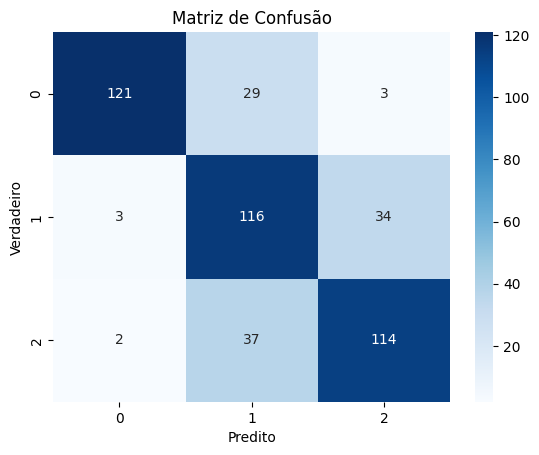

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão')
plt.show()


Importância das Features:
                              Feature  Importance
3      Descricao_Tempo_Agrupada_Chuva    0.260842
2                       Temperatura_C    0.180064
5    Descricao_Tempo_Agrupada_Nublado    0.165683
4  Descricao_Tempo_Agrupada_Céu limpo    0.155253
0                 Velocidade_Vento_ms    0.121465
1                    Rajadas_Vento_ms    0.116693


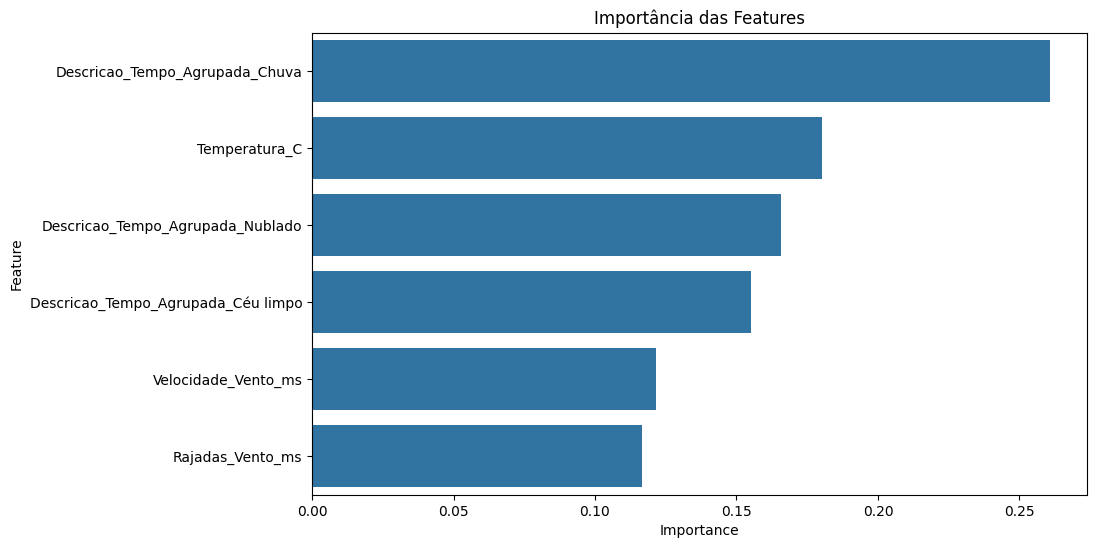

In [ ]:
# Importâncias das features
importances = modelo.feature_importances_
feature_names = X.columns

df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Importância das Features:")
print(df_importances)

# Plotar as importâncias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importances)
plt.title('Importância das Features')
plt.show()


In [ ]:
probabilidades = modelo.predict_proba(X)
# Converter o array de probabilidades em um DataFrame
df_probabilidades = pd.DataFrame(
    probabilidades,
    columns=['Probabilidade_Classe_0', 'Probabilidade_Classe_1', 'Probabilidade_Classe_2']
)

# Concatenar as probabilidades ao DataFrame original
df_resultados = pd.concat([df_merged.reset_index(drop=True), df_probabilidades], axis=1)


In [ ]:
df_resultados['Probabilidade_Classe_0'].value_counts()

,count
Probabilidade_Classe_0,
0.991434,28
0.923839,14
0.992026,12
0.944326,11
0.934444,9
...,...
0.192269,1
0.193087,1
0.193084,1


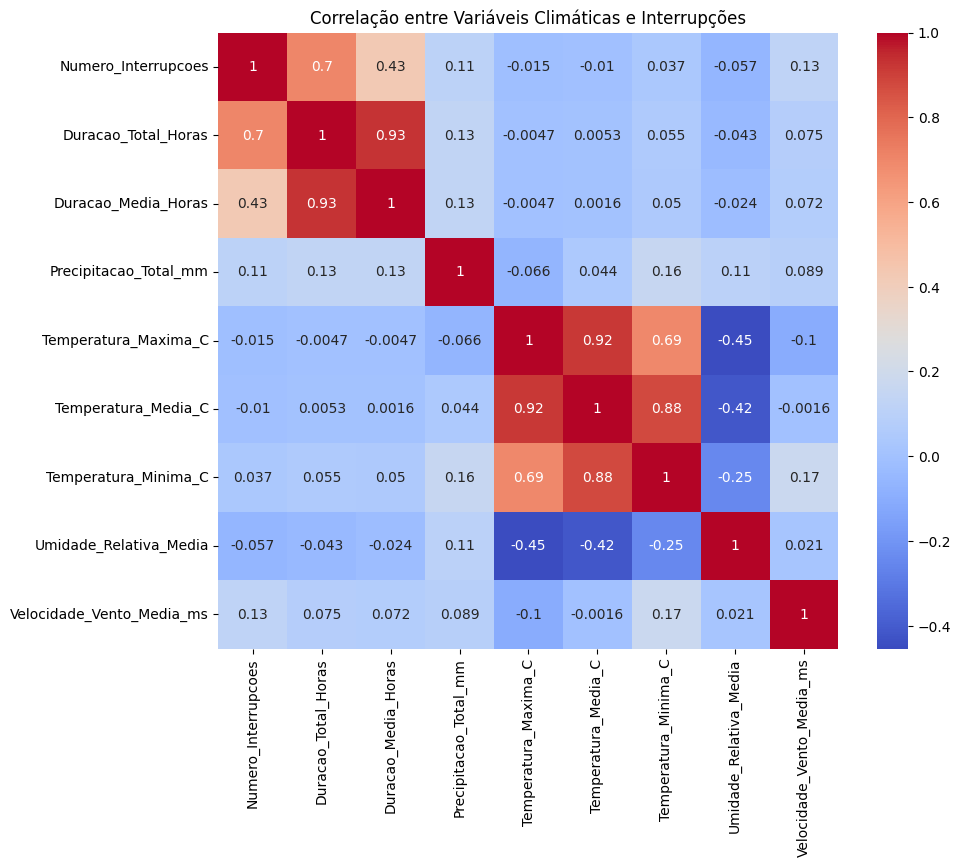

In [ ]:
# Selecionar dados para análise
df_analise = df_merged[['Numero_Interrupcoes', 'Duracao_Total_Horas', 'Duracao_Media_Horas',
                        'Precipitacao_Total_mm', 'Temperatura_Maxima_C', 'Temperatura_Media_C',
                        'Temperatura_Minima_C', 'Umidade_Relativa_Media', 'Velocidade_Vento_Media_ms']]



# Remover valores faltantes
df_analise = df_analise.dropna()

# Calcular correlação
matriz_correlacao = df_analise.corr()

# Visualizar matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Climáticas e Interrupções')
plt.show()


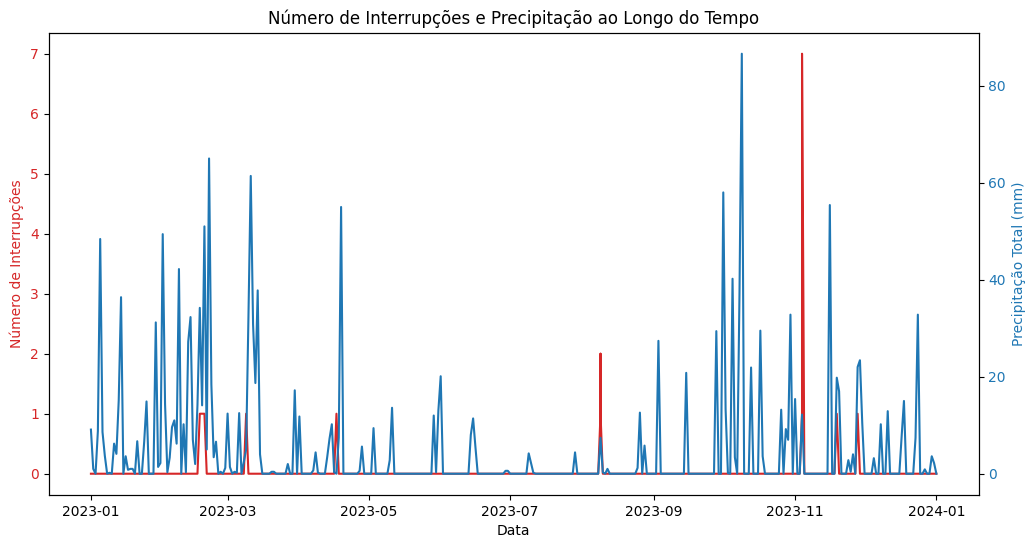

In [ ]:
# Série temporal das interrupções e precipitação
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(df_merged['Data'], df_merged['Numero_Interrupcoes'], color='tab:red')
ax1.set_xlabel('Data')
ax1.set_ylabel('Número de Interrupções', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_merged['Data'], df_merged['Precipitacao_Total_mm'], color='tab:blue')
ax2.set_ylabel('Precipitação Total (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Número de Interrupções e Precipitação ao Longo do Tempo')
plt.show()


In [ ]:
df_merged['Numero_Interrupcoes'] = df_merged['Numero_Interrupcoes'].apply(lambda x:1 if x >= 1 else x)
df_merged['Numero_Interrupcoes'] = df_merged['Numero_Interrupcoes'].astype(int)
df_merged['Numero_Interrupcoes'].value_counts()

,count
Numero_Interrupcoes,
0,357
1,21


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separar as features e o target
X = df_merged[['Precipitacao_Total_mm', 'Temperatura_Maxima_C',
        'Umidade_Relativa_Media', 'Velocidade_Vento_Media_ms']]
y = df_merged['Numero_Interrupcoes']  # 1 se houve interrupção, 0 caso contrário

# Dividir em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(
    n_estimators=50,
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
modelo.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=4,
                       n_estimators=50, random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix

# Prever probabilidades no conjunto de teste
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular AUC-ROC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC: {auc:.2f}")

# Calcular Log Loss
loss = log_loss(y_test, y_prob)
print(f"Log Loss: {loss:.2f}")


AUC-ROC: 0.95
Log Loss: 0.14


In [ ]:
# Prever probabilidades no conjunto completo ou em novos dados
df_merged['Probabilidade_Interrupcao'] = modelo.predict_proba(X)[:, 1]


In [ ]:
df_merged.sort_values(by='Probabilidade_Interrupcao',ascending=False).head()

,Data,Numero_Interrupcoes,Duracao_Total_Horas,Duracao_Media_Horas,Evaporacao_Piche_mm,Insolacao_Total_h,Precipitacao_Total_mm,Temperatura_Maxima_C,Temperatura_Media_C,Temperatura_Minima_C,Umidade_Relativa_Media,Umidade_Relativa_Minima,Velocidade_Vento_Media_ms,Probabilidade_Interrupcao
229,2023-08-09,1,58.425000,58.425000,1.8,6.8,7.4,25.7,19.1,16.0,76.8,45.0,2.4,0.977741
221,2023-08-09,1,5.749167,5.749167,1.8,6.8,7.4,25.7,19.1,16.0,76.8,45.0,2.4,0.977741
222,2023-08-09,1,1.258889,1.258889,1.8,6.8,7.4,25.7,19.1,16.0,76.8,45.0,2.4,0.977741
223,2023-08-09,1,2.081944,2.081944,1.8,6.8,7.4,25.7,19.1,16.0,76.8,45.0,2.4,0.977741
224,2023-08-09,1,3.347500,3.347500,1.8,6.8,7.4,25.7,19.1,16.0,76.8,45.0,2.4,0.977741


In [ ]:

importances = modelo.feature_importances_
feature_names = X_train.columns
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=False)
print(df_importances)


                     Feature  Importance
0      Precipitacao_Total_mm    0.499680
3  Velocidade_Vento_Media_ms    0.257409
1       Temperatura_Maxima_C    0.154381
2     Umidade_Relativa_Media    0.088530


In [ ]:
import joblib
joblib.dump(modelo, 'modelo_rf.pkl')


['modelo_rf.pkl']

In [ ]:
df_previsao = df.copy()
df_previsao['Interrupcao'] = 1
df_previsao['DscTipoInterrupcao'].value_counts()
#df_previsao = df_previsao['DscTipoInterrupcao']

NameError: name 'df' is not defined

In [ ]:
X_future = df_previsoes[['Precipitacao_Total_mm', 'Velocidade_Vento_Media_ms', 'Temperatura_Maxima_C']]

df_previsoes['Probabilidade_Interrupcao'] = modelo.predict_proba(X_future)[:, 1]

# Interrupções por distrito

In [ ]:
df_gpt = df.copy()

In [ ]:
mapping_area = {
    'JOSE BONIFACIO': 'JOSÉ BONIFÁCIO',
    'JD SAO LUIS': 'JARDIM SÃO LUÍS',
    'JAGUARE': 'JAGUARÉ',
    'JARAGUA': 'JARAGUÁ',
    'JD HELENA': 'JARDIM HELENA',
    'JD PAULISTA': 'JARDIM PAULISTA',
    'LIMAO': 'LIMÃO',
    'JD ANGELA': 'JARDIM ÂNGELA',
    'VILA SONIA': 'VILA SÔNIA',
    'AGUA RASA': 'ÁGUA RASA',
    'BELEM': 'BELÉM',
    'BRAS': 'BRÁS',
    'BRASILANDIA': 'BRASILÂNDIA',
    'BUTANTA': 'BUTANTÃ',
    'CANGAIBA': 'CANGAÍBA',
    'CAPAO REDONDO': 'CAPÃO REDONDO',
    'CARRAO': 'CARRÃO',
    'CID ADEMAR': 'CIDADE ADEMAR',
    'CID DUTRA': 'CIDADE DUTRA',
    'CID LIDER': 'CIDADE LÍDER',
    'CID TIRADENTES': 'CIDADE TIRADENTES',
    'CONSOLACAO': 'CONSOLAÇÃO',
    'FREGUESIA DO O': 'FREGUESIA DO Ó',
    'GRAJAU': 'GRAJAÚ',
    'JACANA': 'JAÇANÃ',
    'SACOMA': 'SACOMÃ',
    'SAO DOMINGOS': 'SÃO DOMINGOS',
    'SAO LUCAS': 'SÃO LUCAS',
    'SAO MATEUS': 'SÃO MATEUS',
    'SAO MIGUEL': 'SÃO MIGUEL',
    'SAO RAFAEL': 'SÃO RAFAEL',
    'SAUDE': 'SAÚDE',
    'SE': 'SÉ',
    'TATUAPE': 'TATUAPÉ',
    'TREMEMBE': 'TREMEMBÉ',
    'VILA CURUCA': 'VILA CURUÇÁ',
    'VILA JACUI': 'VILA JACUÍ',
    'SANTA CECILIA': 'SANTA CECÍLIA',
    'REPUBLICA': 'REPÚBLICA'
}


In [ ]:
df_area_por_distrito = pd.read_csv('area_m2_distritos.csv')
df_area_por_distrito.drop(inplace=True,columns='Unnamed: 0')
df_area_por_distrito.columns=['Distrito','Area']
df_area_por_distrito['Distrito'] = df_area_por_distrito['Distrito'].replace(mapping_area)

In [ ]:
distritos_populacao = {
    "Grajaú": 384873,
    "Jardim Ângela": 311432,
    "Capão Redondo": 270767,
    "Sapopemba": 266715,
    "Sacomã": 261436,
    "Jardim São Luís": 259377,
    "Cidade Ademar": 249218,
    "Brasilândia": 243273,
    "Campo Limpo": 236162,
    "Jabaquara": 214958,
    "Jaraguá": 211610,
    "Itaquera": 210960,
    "Itaim Paulista": 205295,
    "Tremembé": 196563,
    "Cidade Tiradentes": 194177,
    "Cidade Dutra": 182459,
    "Pirituba": 179724,
    "Vila Andrade": 168669,
    "Lajeado": 164391,
    "Pedreira": 163586,
    "São Mateus": 155682,
    "Parelheiros": 153695,
    "Iguatemi": 149700,
    "São Rafael": 148145,
    "Cachoeirinha": 143366,
    "Cangaíba": 141172,
    "Vila Curuçá": 140673,
    "São Lucas": 138038,
    "Freguesia do Ó": 137240,
    "Cidade Líder": 136660,
    "Vila Jacuí": 134189,
    "Penha": 132452,
    "Rio Pequeno": 131631,
    "Jardim Helena": 129409,
    "Saúde": 128469,
    "José Bonifácio": 128243,
    "Vila Mariana": 127286,
    "Vila Sônia": 123748,
    "Raposo Tavares": 117738,
    "Ipiranga": 116271,
    "Campo Grande": 115925,
    "Santana": 115689,
    "Vila Medeiros": 114939,
    "Ermelino Matarazzo": 112333,
    "Guaianases": 109316,
    "Vila Maria": 108543,
    "Vila Prudente": 105690,
    "Mandaqui": 103665,
    "Vila Matilde": 103558,
    "Cursino": 103171,
    "Perdizes": 102391,
    "Itaim Bibi": 101452,
    "Tucuruvi": 99559,
    "Tatuapé": 98601,
    "Artur Alvim": 95575,
    "Vila Formosa": 92186,
    "Ponte Rasa": 89881,
    "Aricanduva": 89574,
    "São Domingos": 88884,
    "Perus": 87723,
    "Jaçanã": 87329,
    "Água Rasa": 85788,
    "Santo Amaro": 85349,
    "Carrão": 84397,
    "Limão": 82373,
    "Moema": 81899,
    "Jardim Paulista": 81859,
    "São Miguel": 81011,
    "Santa Cecília": 80972,
    "Mooca": 80880,
    "Casa Verde": 80536,
    "Lapa": 75533,
    "Anhanguera": 75360,
    "Parque do Carmo": 74677,
    "Campo Belo": 71058,
    "Liberdade": 66056,
    "Pinheiros": 65145,
    "República": 60720,
    "Bela Vista": 60024,
    "Belém": 55785,
    "Jaguaré": 55382,
    "Consolação": 53249,
    "Vila Guilherme": 52587,
    "Butantã": 51715,
    "Vila Leopoldina": 46875,
    "Cambuci": 45163,
    "Morumbi": 43690,
    "Brás": 38750,
    "Socorro": 38051,
    "Alto de Pinheiros": 37359,
    "Bom Retiro": 33520,
    "Barra Funda": 33436,
    "Jaguara": 24730,
    "Sé": 23832,
    "Pari": 17359,
    "Marsilac": 11443
}


In [ ]:
import pandas as pd
Dados_Distritos = pd.DataFrame(list(distritos_populacao.items()), columns=['Distrito', 'População'])
Dados_Distritos["Distrito"] = Dados_Distritos["Distrito"].apply(lambda x: x.upper())


In [ ]:
t = pd.DataFrame(list(distritos_renda.items()), columns=['Distrito', 'Renda'])
t['Distrito'] = t['Distrito'].apply(lambda x: x.upper())
t['Distrito'] = t['Distrito'].apply(lambda x:x.replace('CAMBUÇI','CAMBUCI'))

In [ ]:
Dados_Distritos = Dados_Distritos.merge(t,on='Distrito',how='left')

In [ ]:
area = pd.read_csv('area_m2_distritos.csv')
area.drop(inplace=True,columns='Unnamed: 0')
area.columns=['Distrito','Area']


set()

In [ ]:
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Ç','C'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('CIDADE','CID'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('JARDIM','JD'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('É','E'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Á','A'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Ã','A'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Ó','O'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Ô','O'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Í','I'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Â','A'))
Dados_Distritos['Distrito'] = Dados_Distritos['Distrito'].apply(lambda x: x.replace('Ú','U'))


In [ ]:
Dados_Distritos = Dados_Distritos.merge(area,on='Distrito',how='left')

In [ ]:
Dados_Distritos['Area'] = Dados_Distritos['Area'].round(2)

In [ ]:
Dados_Distritos.columns=['Distrito', 'População', 'Renda', 'Area(KM2)']

In [ ]:
Dados_Distritos['Densidade_Populacional'] = (Dados_Distritos['População'] / Dados_Distritos['Area(KM2)']).round(2)

In [ ]:
Dados_Distritos.to_csv('Dados_Distritos.csv',sep=';',decimal=',')

In [ ]:
distritos_renda = {
    "São Domingos": 8515.29,
    "Itaim Bibi": 8427.16,
    "Lajeado": 6575.87,
    "Pinheiros": 6395.36,
    "Jaguara": 6240.82,
    "Jabaquara": 5991.2,
    "Itaquera": 5806.19,
    "Belém": 5710.57,
    "Santo Amaro": 5606.14,
    "Jardim Paulista": 5208.83,
    "Bela Vista": 5401.19,
    "Morumbi": 5237.09,
    "Pirituba": 5230.67,
    "Consolação": 5175.04,
    "Sé": 5022.35,
    "Vila Mariana": 4985.42,
    "Vila Guilherme": 4767.26,
    "Alto de Pinheiros": 4700.97,
    "Barra Funda": 4671.53,
    "Campo Grande": 4645.8,
    "Vila Leopoldina": 4593.8,
    "Liberdade": 4538.4,
    "Butantã": 4555.38,
    "Casa Verde": 4325.72,
    "Jaguaré": 4307.03,
    "Saúde": 4238.58,
    "Parque do Carmo": 4224.39,
    "Ermelino Matarazzo": 4212.92,
    "Moema": 4171.67,
    "Sacomã": 4032.1,
    "Jardim São Luís": 3957.34,
    "Perdizes": 3946.47,
    "Socorro": 3938.38,
    "Santa Cecília": 3930.68,
    "Cambuçi": 3853.13,
    "Mandaqui": 3839.74,
    "Lapa": 3802.85,
    "Campo Belo": 3677.12,
    "Jaraguá": 3674.62,
    "Cidade Ademar": 3599.23,
    "Ipiranga": 3589.47,
    "Ponte Rasa": 3584.08,
    "República": 3518.32,
    "Vila Andrade": 3502.3,
    "Sapopemba": 3431.95,
    "Cursino": 3407.32,
    "Limão": 3398.55,
    "Vila Maria": 3392.08,
    "São Rafael": 3299.41,
    "Vila Jacuí": 3266.62,
    "Vila Prudente": 3204.42,
    "Jardim Helena": 3195.15,
    "Anhanguera": 3158.23,
    "Bom Retiro": 3153.03,
    "Parelheiros": 3149.54,
    "Cidade Tiradentes": 3144.65,
    "José Bonifácio": 3098.35,
    "Água Rasa": 3066.37,
    "Cachoeirinha": 3065.63,
    "Raposo Tavares": 3018.3,
    "Vila Sônia": 3001.23,
    "Tatuapé": 3001.09,
    "São Mateus": 2996.36,
    "Aricanduva": 2990.99,
    "Vila Medeiros": 2954.86,
    "Mooca": 2945.57,
    "Santana": 2871.78,
    "Freguesia do Ó": 2861.29,
    "Cidade Dutra": 2845.7,
    "Brás": 2837.45,
    "Jaçanã": 2819.11,
    "Vila Curuçá": 2799.13,
    "Tucuruvi": 2785.9,
    "Grajaú": 2780.32,
    "Penha": 2776.98,
    "Tremembé": 2771.38,
    "São Lucas": 2743.09,
    "Rio Pequeno": 2734.83,
    "Cangaíba": 2733.4,
    "Pari": 2727.12,
    "Marsilac": 2711.97,
    "Jardim Ângela": 2657.29,
    "Itaim Paulista": 2511.74,
    "Perus": 2506.43,
    "Campo Limpo": 2503.43,
    "Vila Formosa": 2481.96,
    "Capão Redondo": 2477.34,
    "GUAIANASES": 2438.34,
    'IGUATEMI': 2424.06,
    "Vila Matilde": 2410.04,
    "São Miguel": 2383.66,
    "Brasilândia": 2368.05,
    "Carrão": 2310.97,
    "Lajeado": 2276.96,
    'CIDADE LÍDER': 2248.66,
    "Pedreira": 2246.16,
    "Artur Alvim": 2200.7
}


In [ ]:
# 1. Criar df_interrupcoes_por_distrito
df_interrupcoes_por_distrito = df_gpt.groupby('Distrito').size().reset_index(name='Numero_Interrupcoes')
df_interrupcoes_por_distrito['Distrito'] = df_interrupcoes_por_distrito['Distrito'].apply(lambda x: x.upper())

# 2. Criar df_pop_por_distrito
df_pop_por_distrito = pd.DataFrame(list(distritos_populacao.items()), columns=['Distrito', 'População'])
df_pop_por_distrito['Distrito'] = df_pop_por_distrito['Distrito'].apply(lambda x: x.upper())

# 3. Merge de população com interrupções
df_combined = pd.merge(df_pop_por_distrito, df_interrupcoes_por_distrito, on='Distrito', how='left')

# 4. Criar df_renda_por_distrito
df_renda_por_distrito = pd.DataFrame(list(distritos_renda.items()), columns=['Distrito', 'renda_media'])
df_renda_por_distrito['Distrito'] = df_renda_por_distrito['Distrito'].apply(lambda x: x.upper())
df_renda_por_distrito['Distrito'] = df_renda_por_distrito['Distrito'].apply(lambda x:x.replace('CAMBUÇI','CAMBUCI'))


# 5. Adicionar renda média ao df_combined
df_combined = pd.merge(df_combined, df_renda_por_distrito, on='Distrito', how='left')
df_combined = pd.merge(df_combined,df_area_por_distrito,on='Distrito',how='left')




In [ ]:
df_previsao = pd.read_csv('Dados_nulos_previstos.csv')

In [ ]:
map_shp = {
    'BELÉM': 'BELEM',
    'BRASILÂNDIA': 'BRASILANDIA',
    'BRÁS': 'BRAS',
    'BUTANTÃ': 'BUTANTA',
    'CANGAÍBA': 'CANGAIBA',
    'CAPÃO REDONDO': 'CAPAO REDONDO',
    'CARRÃO': 'CARRAO',
    'CIDADE ADEMAR': 'CID ADEMAR',
    'CIDADE DUTRA': 'CID DUTRA',
    'CIDADE LÍDER': 'CID LIDER',
    'CIDADE TIRADENTES': 'CID TIRADENTES',
    'CONSOLAÇÃO': 'CONSOLACAO',
    'FREGUESIA DO Ó': 'FREGUESIA DO O',
    'GRAJAÚ': 'GRAJAU',
    'JAGUARÉ': 'JAGUARE',
    'JARAGUÁ': 'JARAGUA',
    'JARDIM HELENA': 'JD HELENA',
    'JARDIM PAULISTA': 'JD PAULISTA',
    'JARDIM SÃO LUÍS': 'JD SAO LUIS',
    'JARDIM ÂNGELA': 'JD ANGELA',
    'JAÇANÃ': 'JACANA',
    'JOSÉ BONIFÁCIO': 'JOSE BONIFACIO',
    'LIMÃO': 'LIMAO',
    'REPÚBLICA': 'REPUBLICA',
    'SACOMÃ': 'SACOMA',
    'SANTA CECÍLIA': 'SANTA CECILIA',
    'SAÚDE': 'SAUDE',
    'SÉ': 'SE',
    'TATUAPÉ': 'TATUAPE',
    'TREMEMBÉ': 'TREMEMBE',
    'VILA CURUÇÁ': 'VILA CURUCA',
    'VILA JACUÍ': 'VILA JACUI',
    'VILA SÔNIA': 'VILA SONIA',
    'ÁGUA RASA': 'AGUA RASA',
    # Os distritos que já correspondem não precisam ser mapeados, mas podemos incluí-los para completude
    'CIDADE TIRADENTES': 'CID TIRADENTES',
    'JAÇANÃ': 'JACANA',
    'SAÚDE': 'SAUDE',
    'SÃO DOMINGOS': 'SAO DOMINGOS',
    'SÃO LUCAS': 'SAO LUCAS',
    'SÃO MATEUS': 'SAO MATEUS',
    'SÃO MIGUEL': 'SAO MIGUEL',
    'SÃO RAFAEL': 'SAO RAFAEL',
    # Note que 'SÃO MIGUEL' já está correto, mas podemos mapear para garantir consistência
}


In [ ]:
df_total = df_combined.copy()
df_total.loc[df_total['Numero_Interrupcoes'].isnull(), 'Numero_Interrupcoes'] = df_previsao['Numero_Interrupcoes_Previstas'].values
# Aplicar o mapeamento
df_total['Distrito'] = df_total['Distrito'].replace(map_shp)


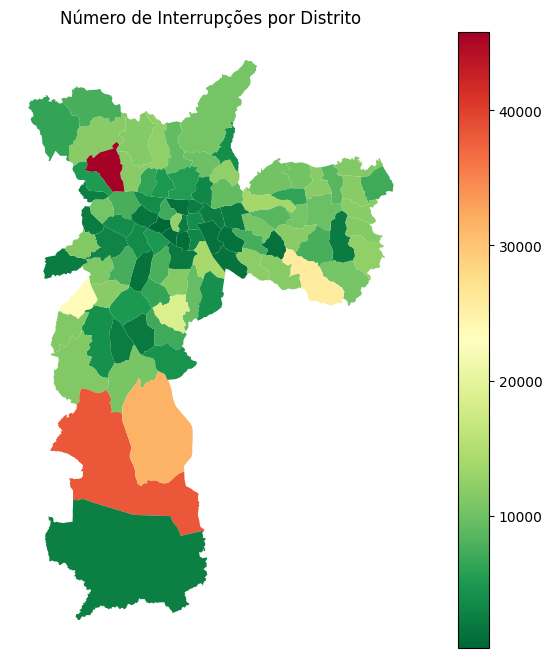

In [ ]:
import geopandas as gpd
# Converter para letras maiúsculas e remover espaços extras



# Carregar o shapefile dos distritos
gdf = gpd.read_file('DEINFO_DISTRITO.shp')

# Unir com o dataframe combinado
gdf = gdf.merge(df_total, left_on='NOME_DIST', right_on='Distrito')

# Plotar o mapa temático
gdf.plot(column='Numero_Interrupcoes', cmap='RdYlGn_r', legend=True, figsize=(12,8))
plt.title('Número de Interrupções por Distrito')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import json


In [ ]:
shapefile_path = '/content/DEINFO_DISTRITO.shp'
gdf_distritos = gpd.read_file(shapefile_path)
mapa = pd.read_csv('/content/teste_mapa2.csv')
gdf_distritos.rename(columns={'NOME_DIST': 'Distrito'}, inplace=True)

In [ ]:
def ajustar_nome_distrito(nome):
    nome = nome.upper().replace('_', ' ')
    nome = nome.replace('M BOI MIRIM', 'JAGUARE')  # Mapear para JD ANGELA
    nome = nome.replace('VILA CURUÇA', 'VILA CURUCA')
    nome = nome.replace('JARDIM SAO LUIS', 'JD SAO LUIS')
    nome = nome.replace('JARDIM HELENA', 'JD HELENA')
    nome = nome.replace('JARDIM ANGELA', 'JD ANGELA')
    nome = nome.replace('CIDADE ', 'CID ')
    nome = nome.replace('ALTO DE PINHEIROS', 'ALTO DE PINHEIROS')
    nome = nome.replace('FREGUESIA DO O', 'FREGUESIA DO O')
    nome = nome.replace('JARDIM PAULISTA', 'JD PAULISTA')
    # Remover acentos e caracteres especiais
    import unicodedata
    nome = unicodedata.normalize('NFKD', nome).encode('ASCII', 'ignore').decode('ASCII')
    nome = nome.strip()
    return nome


In [ ]:
mapa['Distrito'] = mapa['Distrito'].apply(ajustar_nome_distrito)


In [ ]:
gdf_filtrado = gdf_distritos.merge(mapa, on='Distrito')
gdf_filtrado['DATA_CRIAC'] = gdf_filtrado['DATA_CRIAC'].astype(str)
gdf_filtrado['Data_Hora'] = mapa['Data_Hora']


In [ ]:
# Converter o GeoDataFrame para GeoJSON
gdf_filtrado = gdf_filtrado.set_geometry('geometry')
gdf_filtrado = gdf_filtrado.to_crs(epsg=4326)  # Garantir que está no sistema de coordenadas WGS84

geojson_distritos = json.loads(gdf_filtrado.to_json())


In [ ]:
gdf_filtrado['Probabilidade_Queda'] = gdf_filtrado['Probabilidade_Classe_1'] + gdf_filtrado['Probabilidade_Classe_2']

In [ ]:
# Formatar
gdf_filtrado['Probabilidade_Queda_Pct'] = (gdf_filtrado['Probabilidade_Queda'] * 100).round(2)

# Atualizar o mapa
fig = px.choropleth_mapbox(
    gdf_filtrado,
    geojson=geojson_distritos,
    locations='Distrito',
    featureidkey='properties.Distrito',
    color='Probabilidade_Queda',
    color_continuous_scale='YlOrRd',
    range_color=(0, 1),
    mapbox_style='carto-positron',
    zoom=10,
    center={'lat': -23.55052, 'lon': -46.63331},
    opacity=0.7,
    labels={'Probabilidade_Queda': 'Probabilidade de Queda (%)'},
    hover_data={
        'Distrito': True,
        'Probabilidade_Queda_Pct': True,
        'Data_Hora': True
    }
)
fig.update_layout(
    title_text='Probabilidade de Queda de Energia nos Distritos de São Paulo',
    title_x=0.5,
    margin={'r':0, 't':50, 'l':0, 'b':0},
    coloraxis_colorbar={
        'title': 'Probabilidade (%)',
        'tickvals': [0, 0.25, 0.5, 0.75, 1],
        'ticktext': ['0%', '25%', '50%', '75%', '100%']
    }
)
# Remover 'Probabilidade_Queda' da tooltip padrão
fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Probabilidade: %{customdata[1]}%<br>Data/Hora: %{customdata[2]}<extra></extra>')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_filtrado.dtypes

NameError: name 'df_filtrado' is not defined

In [ ]:
# Gerar o mapa com animação temporal
fig = px.choropleth_mapbox(
    gdf_filtrado,
    geojson=geojson_distritos,
    locations='Distrito',
    featureidkey='properties.Distrito',
    color='Probabilidade_Queda',
    color_continuous_scale='YlOrRd',
    range_color=(0, 1),
    mapbox_style='carto-positron',
    zoom=10,
    center={'lat': -23.55052, 'lon': -46.63331},
    opacity=0.7,
    labels={'Probabilidade_Queda': 'Probabilidade de Queda (%)'},
    hover_data={
        'Distrito': True,
        'Probabilidade_Queda_Pct': True
    },
    animation_frame='Data_Hora',
    animation_group='Distrito'
)

# Atualizar o layout
fig.update_layout(
    title_text='Probabilidade de Queda de Energia nos Distritos de São Paulo ao Longo do Tempo',
    title_x=0.5,
    margin={'r':0, 't':50, 'l':0, 'b':0},
    coloraxis_colorbar={
        'title': 'Probabilidade (%)',
        'tickvals': [0, 0.25, 0.5, 0.75, 1],
        'ticktext': ['0%', '25%', '50%', '75%', '100%']
    }
)

# Ajustar a velocidade da animação
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # 1000ms por frame
plt.show()
